In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Remove the common warnings due to deprecated options:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Needed for scaling values for KNN modeling.
from sklearn.neighbors import KNeighborsClassifier # For KNN modeling.
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv('Classified Data')
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


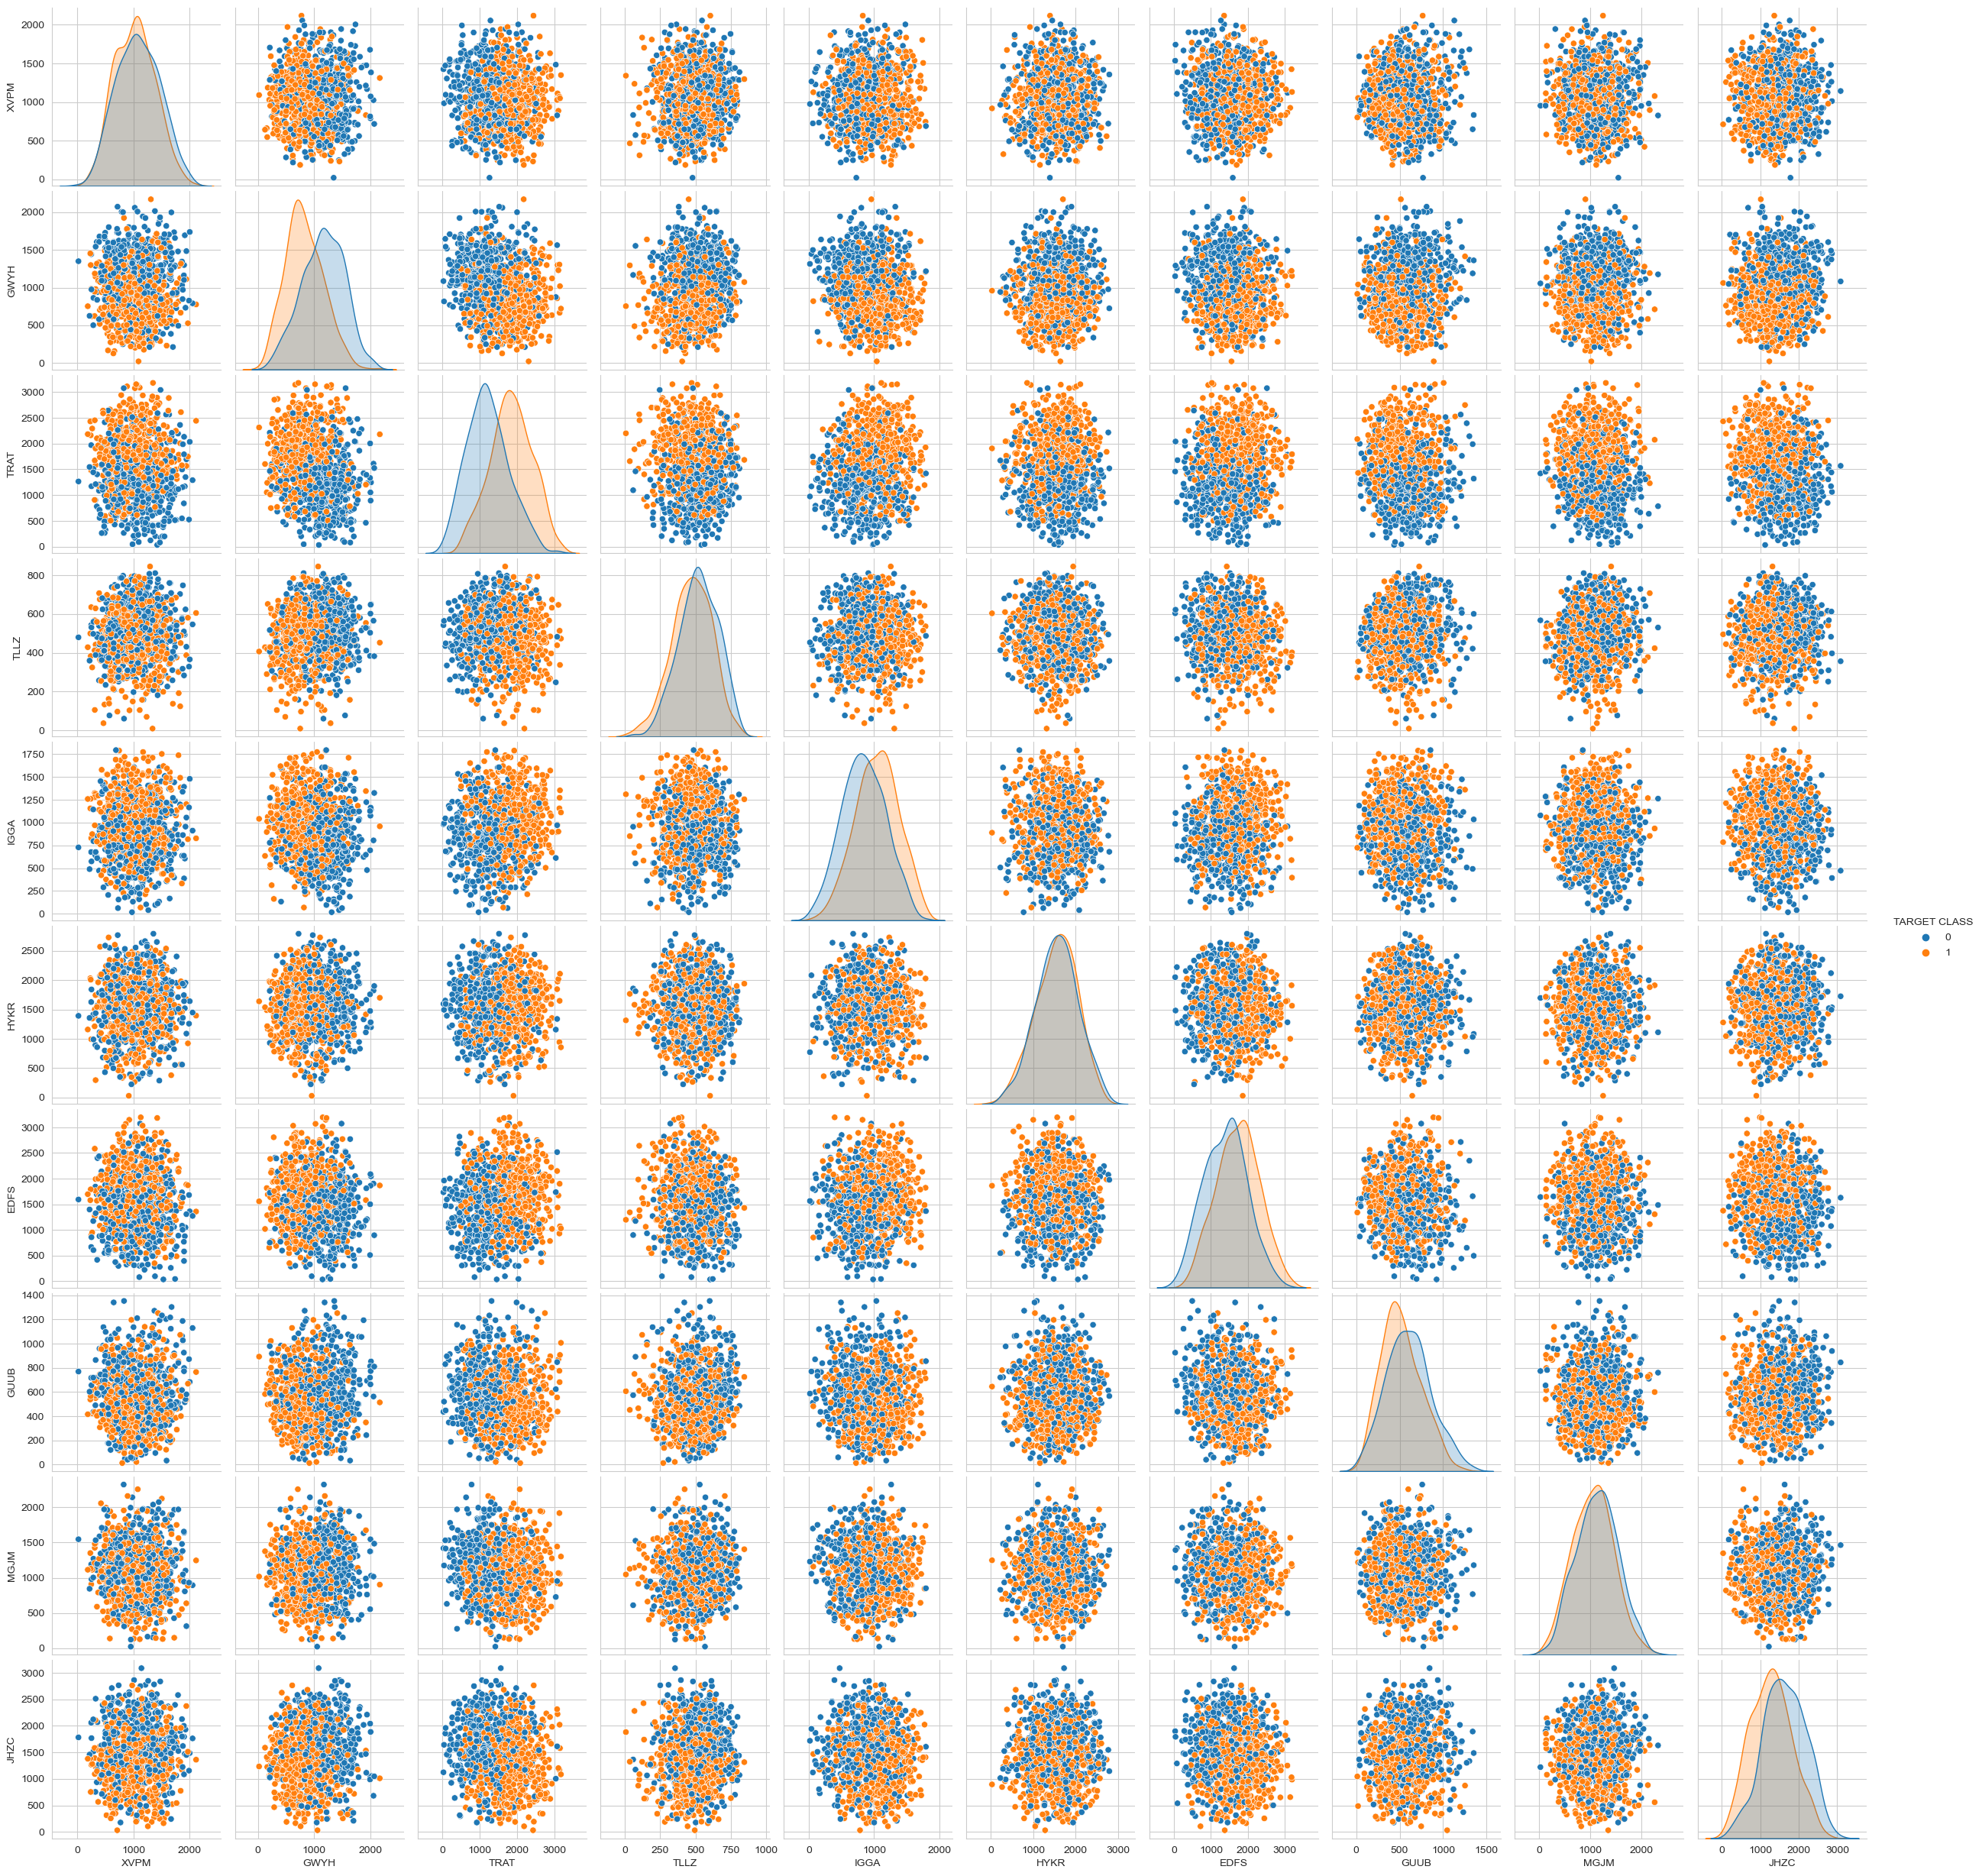

In [6]:
# Checking for possible correlations between features; specifically regarding "TARGET ClASS":
sns.pairplot(data=df,hue='TARGET CLASS')

In [7]:
# Standardize the data for every columns except the "TARGET CLASS":
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [8]:
# Transform the fitted features to their scaled version:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
# Remake the data frame with scaled features (excluding the target field):
scaled_df = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [9]:
# Train/test split for machine learning:
x = scaled_df
y = df['TARGET CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [10]:
# Modeling to find probability of payments using "1" as k value:
knnm = KNeighborsClassifier(n_neighbors=1)

In [11]:
# Train model:
knnm.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
# Predict data based on the trained model:
predictions = knnm.predict(x_test)

In [13]:
# Check the confusion matrix and classification report:
print(f'With K = 1 \n\nConfusion Matrix: \n{confusion_matrix(y_test,predictions)}\n\
    \nClassification Report: \n{classification_report(y_test,predictions)}')

With K = 1 

Confusion Matrix: 
[[109  43]
 [ 41 107]]
    
Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [16]:
# Finding a better k value for the model:
err_rate = []
for n in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    pred_n = knn.predict(x_test)
    err_rate.append(np.mean(pred_n != y_test))

Text(0, 0.5, 'Error Rate')

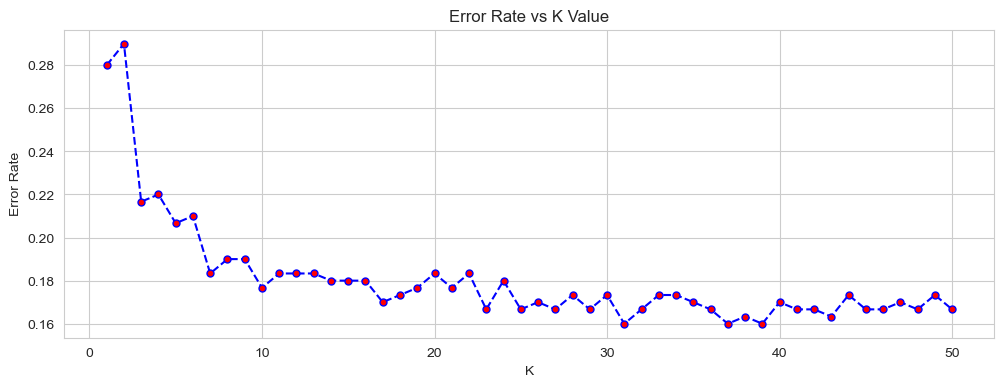

In [17]:
# Plotting the error rates for better understanding using the elbow method:
plt.figure(figsize=(12,4))
plt.plot(range(1,51),err_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=5)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
# Using k value of 31 (identified from above), instead of 1:
knnm = KNeighborsClassifier(n_neighbors=31)
knnm.fit(x_train, y_train)
predictions = knnm.predict(x_test)
print(f'With K = 31 \n\nConfusion Matrix: \n{confusion_matrix(y_test,predictions)}\n\
    \nClassification Report: \n{classification_report(y_test,predictions)}')

With K = 31 

Confusion Matrix: 
[[123  29]
 [ 19 129]]
    
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

